# WMT figs of $G^{NC}_\Omega(\theta)$

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
#import cartopy.crs as ccrs #cartopy coord ref sys
#import cartopy
#import cartopy.feature as cfeature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
#import dask
#import dask.array as dsa
#from xgcm import Grid
#import xgcm 
#from xgcm.autogenerate import generate_grid_ds
#from xhistogram.xarray import histogram
#from matplotlib.colors import LogNorm

In [6]:
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

era = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_updated.zarr'))
sst_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_sst-clim.zarr'))
flx_clim = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/ERA5/datasets/hist_ds_flx-clim.zarr'))

In [7]:
era

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [3]:
sst_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

In [5]:
flx_clim

<xarray.Dataset> Size: 29MB
Dimensions:     (time: 5113, theta_bin: 179)
Coordinates:
  * theta_bin   (theta_bin) float64 1kB 20.05 20.15 20.25 ... 37.65 37.75 37.85
  * time        (time) datetime64[ns] 41kB 2010-01-01 2010-01-02 ... 2023-12-31
Data variables:
    omega_slhf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_sshf  (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_ssr   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>
    omega_str   (time, theta_bin) float64 7MB dask.array<chunksize=(1279, 45), meta=np.ndarray>

# 2010 - 2023 pcolor plots

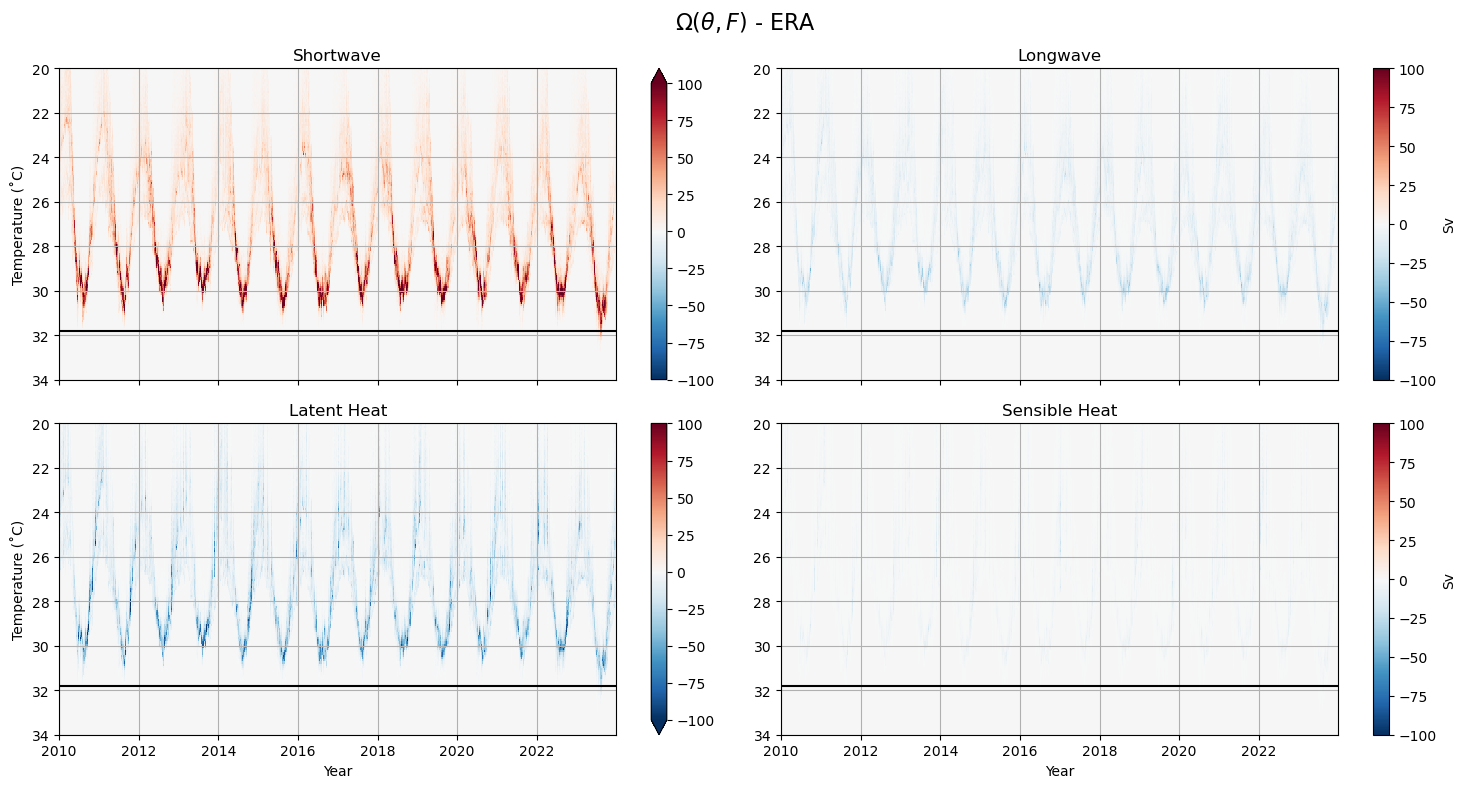

In [37]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(era.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, F)$ - ERA", fontsize=16)
plt.tight_layout()
#plt.savefig('paper-figs/era/pcolor.pdf', transparent=True);

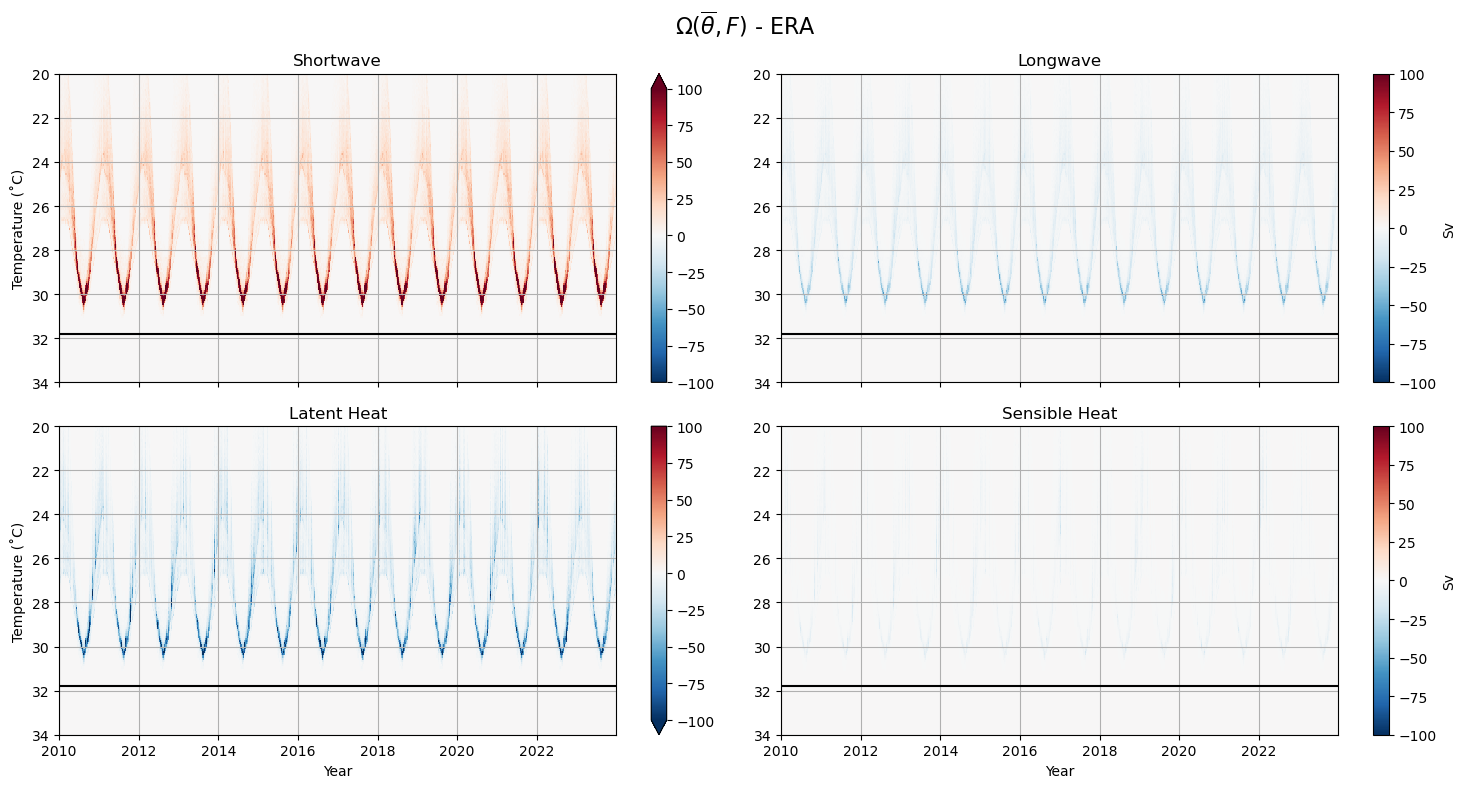

In [33]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(sst_clim.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_clim.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_clim.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_clim.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\overline{\theta}, F)$ - ERA", fontsize=16)
plt.tight_layout()
#plt.savefig('paper-figs/era/pcolor-sst_clim.pdf', transparent=True);

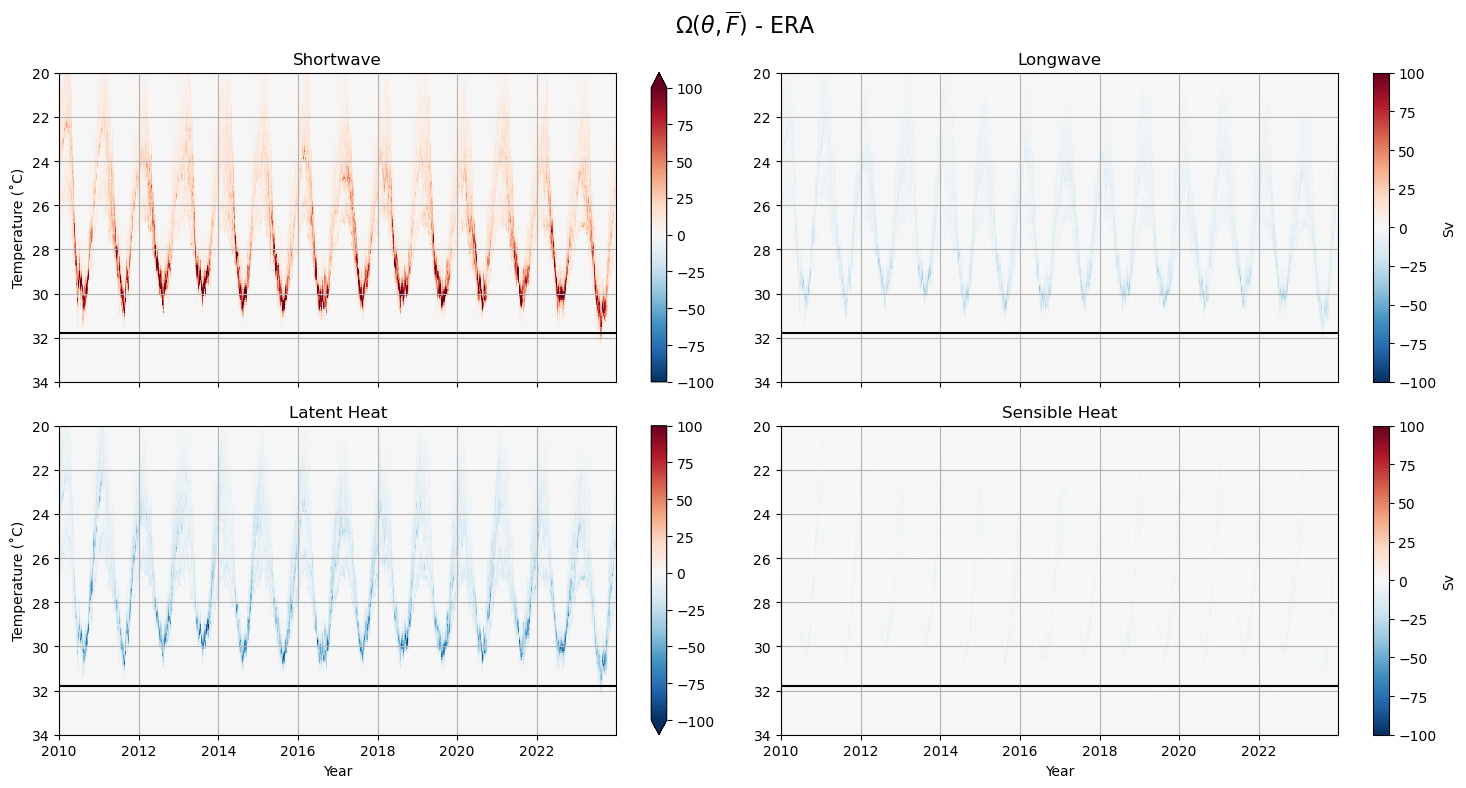

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)
(flx_clim.omega_ssr/1e6).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(flx_clim.omega_str/1e6).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(flx_clim.omega_slhf/1e6).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(flx_clim.omega_sshf/1e6).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, \overline{F})$ - ERA", fontsize=16)
plt.tight_layout()
#plt.savefig('paper-figs/era/pcolor-flx_clim.pdf', transparent=True);

# 2023 pcolor plots

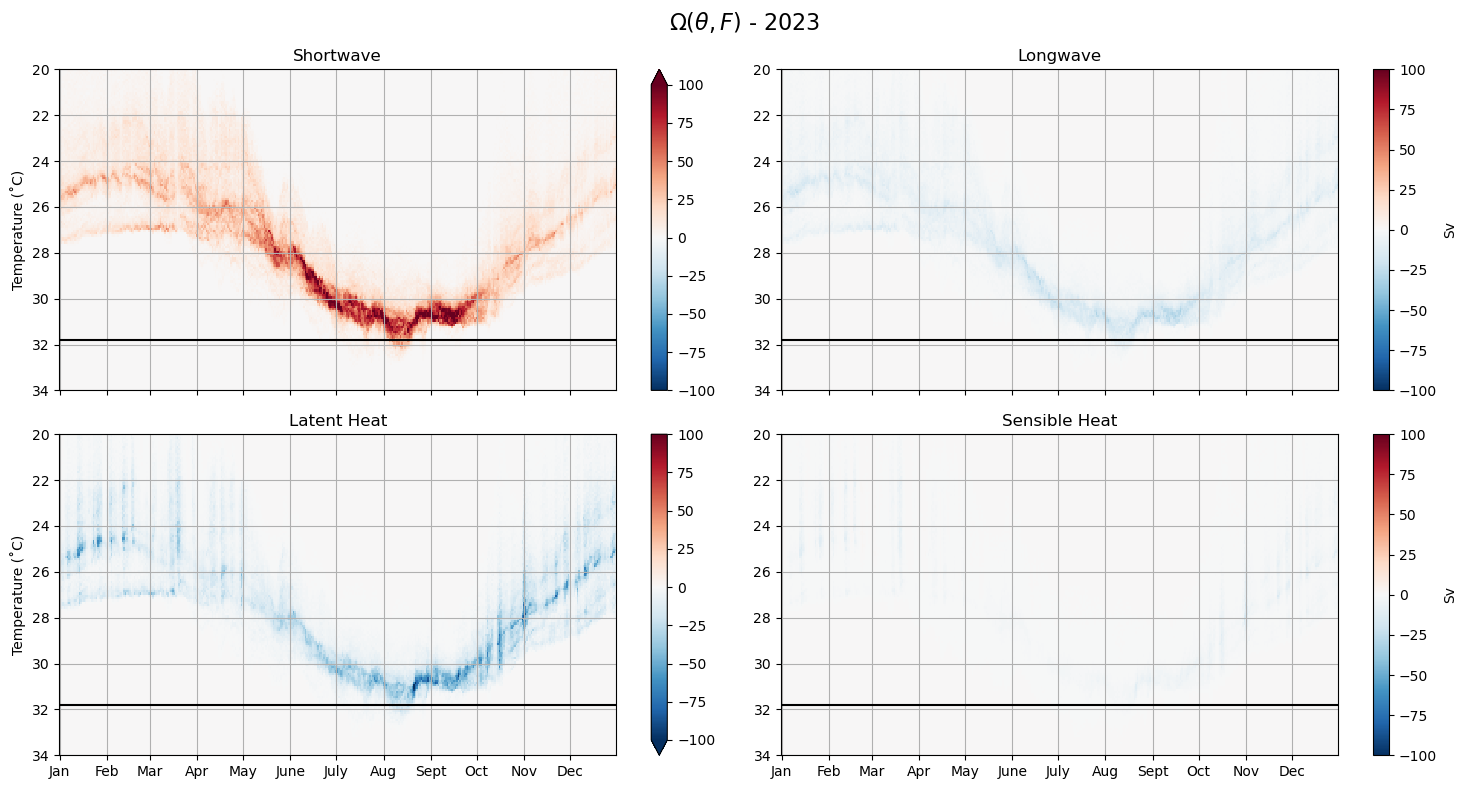

In [137]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

T = [sst_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]
year = dict(time=slice('2023', '2023'))

(era.omega_ssr/1e6).sel(**year).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era.omega_str/1e6).sel(**year).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era.omega_slhf/1e6).sel(**year).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era.omega_sshf/1e6).sel(**year).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, F)$ - 2023", fontsize=16)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-2023.pdf', transparent=True);

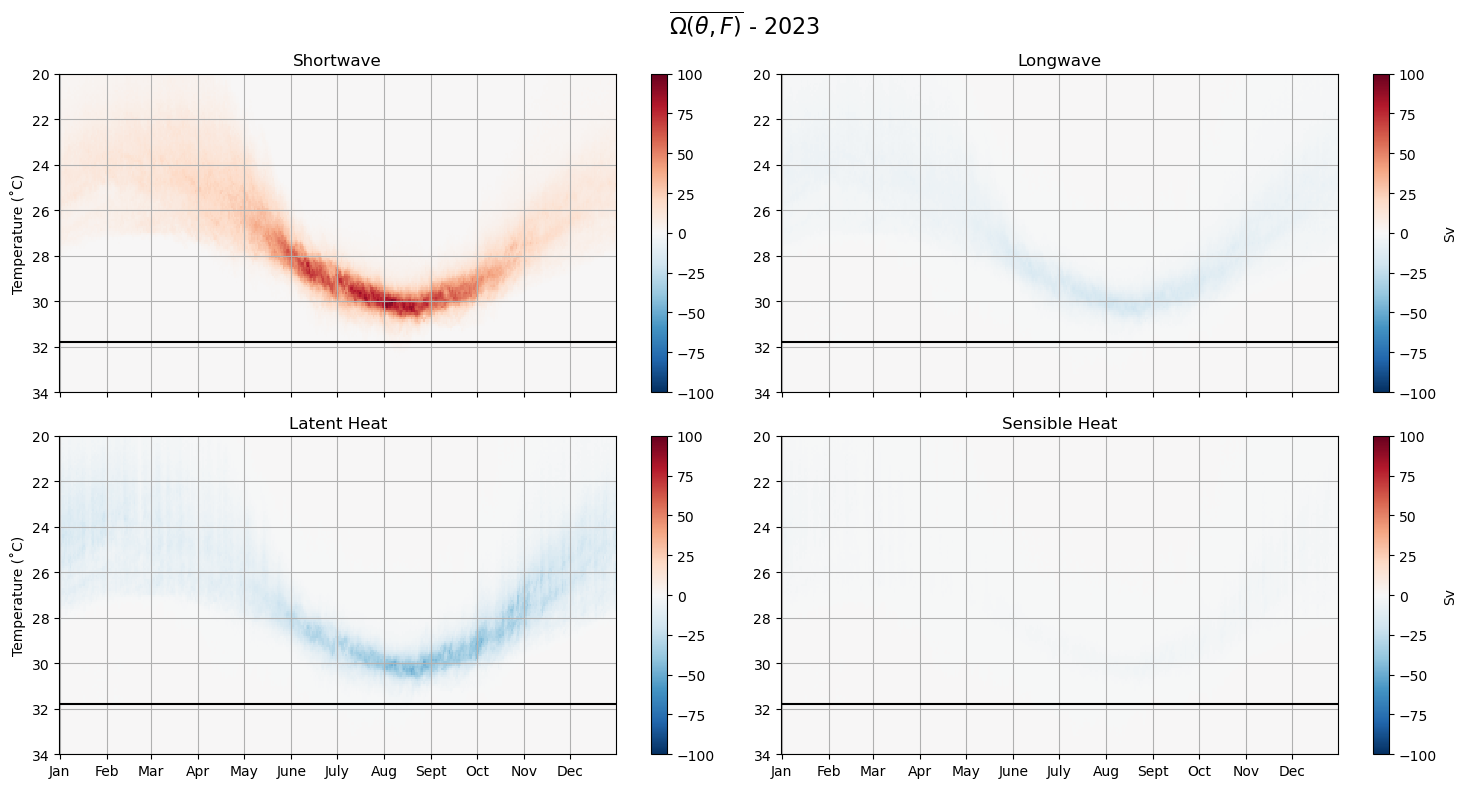

In [139]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

era_clim = era.groupby('time.dayofyear').mean('time')
#+1 bc climatology includes the leap years so dayofyear output==366 not 365
T = [era_clim.dayofyear[i].values for i in [0, 31, 59+1, 90+1, 120+1, 151+1, 181+1, 212+1, 243+1, 273+1, 304+1, 334+1,]]

(era_clim.omega_ssr/1e6).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(era_clim.omega_str/1e6).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(era_clim.omega_slhf/1e6).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(era_clim.omega_sshf/1e6).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\overline{\Omega(\theta, F)}$ - 2023", fontsize=16)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-clim-2023.pdf', transparent=True);

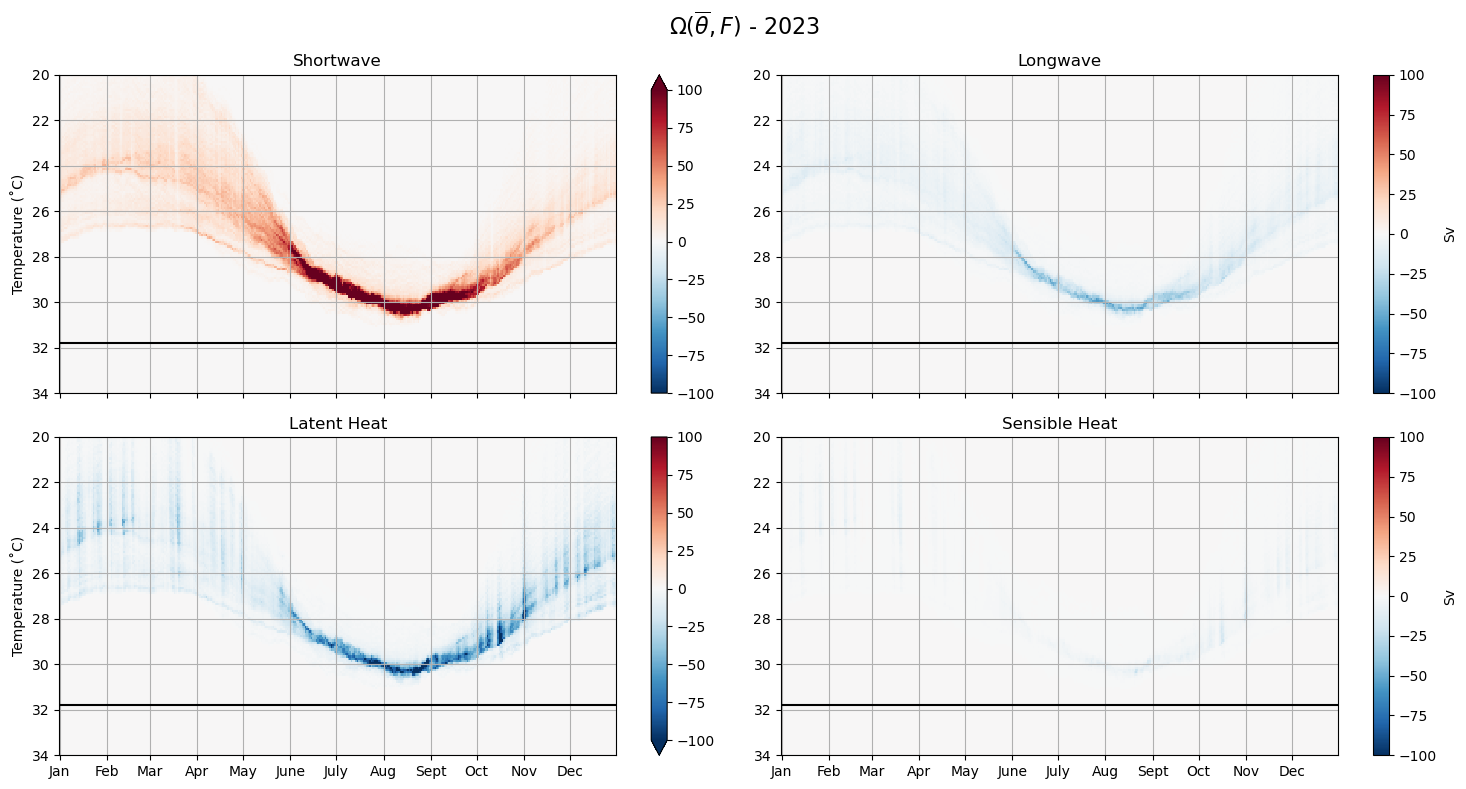

In [140]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

T = [sst_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]
year = dict(time=slice('2023', '2023'))

(sst_clim.omega_ssr/1e6).sel(**year).T.plot(label='SW', ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(sst_clim.omega_str/1e6).sel(**year).T.plot(label='LW', ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(sst_clim.omega_slhf/1e6).sel(**year).T.plot(label='LH', ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(sst_clim.omega_sshf/1e6).sel(**year).T.plot(label='SH', ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\overline{\theta}, F)$ - 2023", fontsize=16)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-sst_clim-2023.pdf', transparent=True);

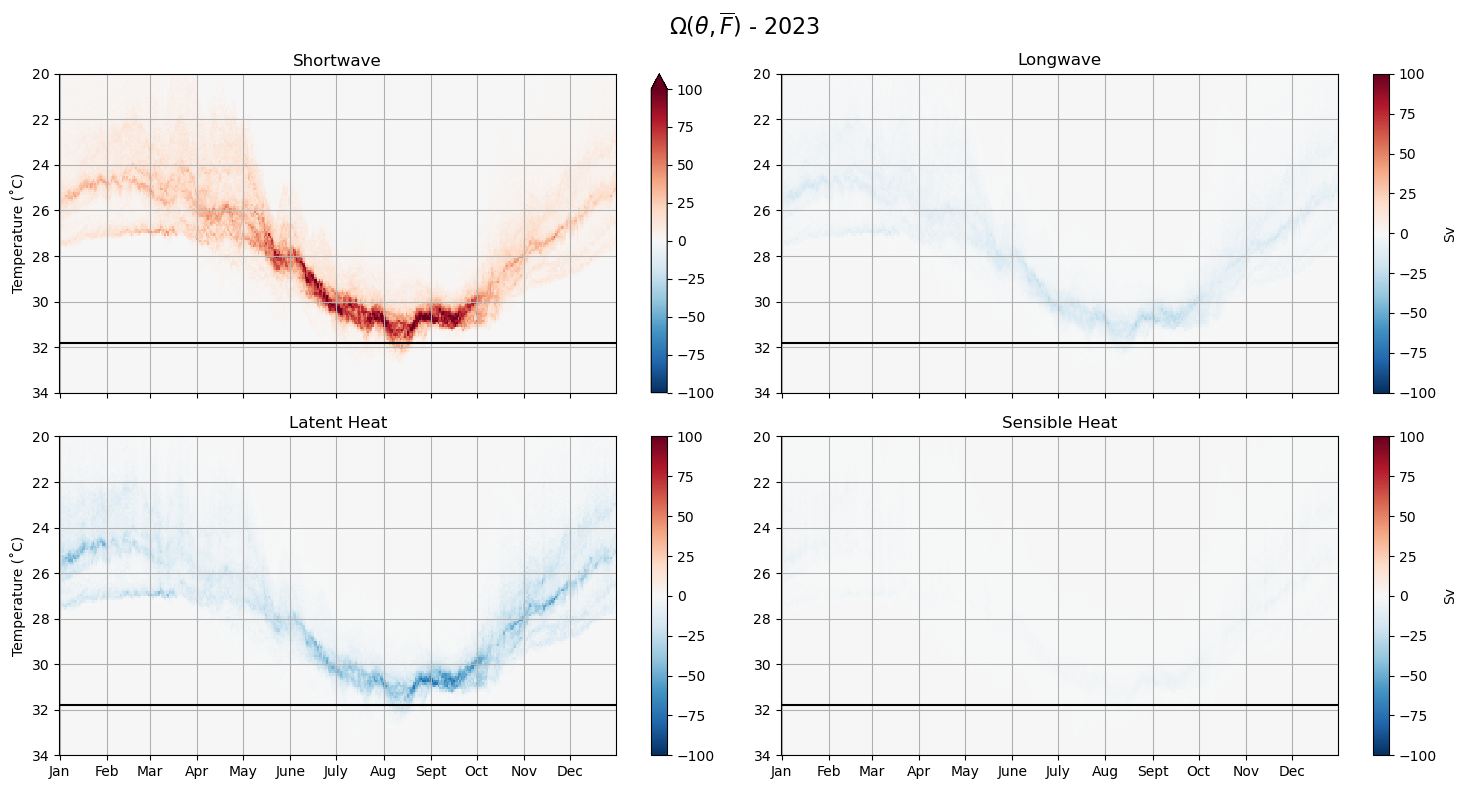

In [141]:
fig, ax = plt.subplots(2,2, figsize=(15,8), sharex=True)

T = [flx_clim.sel(**year).time[i].values for i in [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334,]]
year = dict(time=slice('2023', '2023'))

(flx_clim.omega_ssr/1e6).sel(**year).T.plot(ax=ax[0,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':''})
ax[0,0].set_ylim(34,20)
ax[0,0].grid()
ax[0,0].set_title('Shortwave')
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel('Temperature (˚C)')
ax[0,0].axhline(31.8, color='k')
(flx_clim.omega_str/1e6).sel(**year).T.plot(ax=ax[0,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r',cbar_kwargs={'label':'Sv'})
ax[0,1].set_ylim(34,20)
ax[0,1].grid()
ax[0,1].set_title('Longwave')
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel('')
ax[0,1].axhline(31.8, color='k')
(flx_clim.omega_slhf/1e6).sel(**year).T.plot(ax=ax[1,0], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':''})
ax[1,0].set_ylim(34,20)
ax[1,0].grid()
ax[1,0].set_title('Latent Heat')
ax[1,0].set_xticks(T)
ax[1,0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel('Temperature (˚C)')
ax[1,0].axhline(31.8, color='k')
(flx_clim.omega_sshf/1e6).sel(**year).T.plot(ax=ax[1,1], vmax=100, vmin=-100, rasterized=True,
                                       cmap='RdBu_r', cbar_kwargs={'label':'Sv'})
ax[1,1].set_ylim(34,20)
ax[1,1].grid()
ax[1,1].set_title('Sensible Heat')
ax[1,1].set_xticks(T)
ax[1,1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
                    'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax[1,1].set_xlabel('')
ax[1,1].set_ylabel('')
ax[1,1].axhline(31.8, color='k')

plt.suptitle(r"$\Omega(\theta, \overline{F})$ - 2023", fontsize=16)
plt.tight_layout()
plt.savefig('paper-figs/era/pcolor-flx_clim-2023.pdf', transparent=True);